In [51]:
#Standard imports 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import requests as r
%matplotlib inline

In [52]:
#Reference file path

file = '/Users/gta/Desktop/globalterrorismdb_0617dist.csv'
presidents = '/Users/gta/Desktop/project-001/us_presidents.csv'
gdp_filepath = '/Users/gta/Desktop/project-001/gdp_data.csv'
country_codes = '/Users/gta/Desktop/project-001/country_code.csv'

In [141]:
#Read CSV into dataframe.  Forced encoding to 'cp1252 due to error.

df = pd.read_csv(file, encoding='cp1252', low_memory=False, skipinitialspace=True)
df_presidents = pd.read_csv(presidents, skipinitialspace=True)
df_gdp = pd.read_csv(gdp_filepath, skipinitialspace=True)
df_codes = pd.read_csv(country_codes, skipinitialspace=True)

In [142]:
#Select a portion of the columns and send them to a new dataframe

df = df[['iyear',
 'imonth',
 'iday',
 'country_txt',
 'region_txt',
 'city',
 'latitude',
 'longitude',
 'location',
 'success',
 'suicide',
 'attacktype1_txt',
 'targtype1_txt',
 'natlty1_txt',
 'gname',
 'weaptype1_txt',
 'nkill',
 'nwound']]

In [143]:
#Generate dictionary needed to rename columns

col_name = {'iyear': 'year',
 'imonth': 'month',
 'iday': 'day',
 'country_txt': 'country',
 'region_txt': 'region',
 'city': 'city',
 'latitude': 'latitude',
 'longitude': 'longitude',
 'location': 'location',
 'success': 'success',
 'suicide': 'sucide',
 'attacktype1_txt': 'type_of_attack',
 'targtype1_txt': 'type_of_target',
 'natlty1_txt': 'nationality',
 'gname': 'group_name',
 'weaptype1_txt': 'type_of_weapon',
 'nkill': 'num_killed',
 'nwound': 'num_wounded'}

#Rename columns based on dict and display head

df = df.rename(columns=col_name)
df.columns.tolist()

['year',
 'month',
 'day',
 'country',
 'region',
 'city',
 'latitude',
 'longitude',
 'location',
 'success',
 'sucide',
 'type_of_attack',
 'type_of_target',
 'nationality',
 'group_name',
 'type_of_weapon',
 'num_killed',
 'num_wounded']

In [144]:
df['num_killed'].fillna(value = 0, inplace=True)
df['num_wounded'].fillna(value = 0, inplace=True)

In [145]:
df['num_killed_wounded'] = df['num_killed'] + df['num_wounded']

In [146]:
df_presidents.columns.tolist()

['year', 'president', 'party']

In [147]:
col_name = {'country_code': 'country'}
df_gdp = df_gdp.rename(columns=col_name)
df_gdp.columns.tolist()

['country', 'country_name', 'gdp_value', 'gdp_year']

In [148]:
col_name = {'Name': 'country', 'Code': 'code'}
df_codes = df_codes.rename(columns=col_name)
df_codes.columns.tolist()

['country', 'code']

In [149]:
df_president_main = pd.merge(df, df_presidents, on='year', how='inner')

In [150]:
df_president_main_codes = pd.merge(df_president_main, df_codes, on='country', how='inner')

In [151]:
df_president_main_codes['helper'] = df_president_main_codes['code'] + df_president_main_codes['year'].map(str)

In [152]:
df_president_main_codes.columns.tolist()

['year',
 'month',
 'day',
 'country',
 'region',
 'city',
 'latitude',
 'longitude',
 'location',
 'success',
 'sucide',
 'type_of_attack',
 'type_of_target',
 'nationality',
 'group_name',
 'type_of_weapon',
 'num_killed',
 'num_wounded',
 'num_killed_wounded',
 'president',
 'party',
 'code',
 'helper']

In [153]:
df_gdp['helper'] = df_gdp['country'] + df_gdp['gdp_year'].map(str)  

In [154]:
df_gdp.columns.tolist()

['country', 'country_name', 'gdp_value', 'gdp_year', 'helper']

In [155]:
df_gdp = df_gdp.drop(['country'], axis = 1)

In [156]:
df_gdp.columns.tolist()

['country_name', 'gdp_value', 'gdp_year', 'helper']

In [157]:
df_combined = pd.merge(df_president_main_codes, df_gdp, on='helper', how='inner')

In [158]:
df_combined = df_combined.drop(['gdp_year'], axis = 1)

In [159]:
df_combined.head()

,year,month,day,country,region,city,latitude,longitude,location,success,...,type_of_weapon,num_killed,num_wounded,num_killed_wounded,president,party,code,helper,country_name,gdp_value
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,1,...,Unknown,1.0,0.0,1.0,Richard Nixon,Republican,DO,DO1970,Dominican Republic,1.485400e+09
1,1970,3,24,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,1,...,Unknown,0.0,0.0,0.0,Richard Nixon,Republican,DO,DO1970,Dominican Republic,1.485400e+09
2,1971,1,28,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,1,...,Firearms,0.0,0.0,0.0,Richard Nixon,Republican,DO,DO1971,Dominican Republic,1.666400e+09
3,1971,1,28,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,1,...,Firearms,0.0,0.0,0.0,Richard Nixon,Republican,DO,DO1971,Dominican Republic,1.666400e+09
4,1971,5,11,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,0,...,Explosives/Bombs/Dynamite,0.0,0.0,0.0,Richard Nixon,Republican,DO,DO1971,Dominican Republic,1.666400e+09


In [166]:
df_combined['party'] = df_combined['party'].str.strip()

In [167]:
df_party_sum_gb = df_combined[['party', 'success', 'num_killed_wounded']].groupby('party', as_index = False).sum()
df_party_sum_gb

,party,success,num_killed_wounded
0,Democratic,87007,496373.0
1,Republican,56782,324698.0


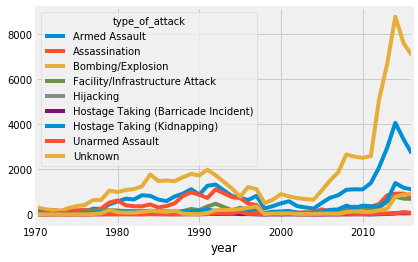

In [74]:
df_combined_ct = pd.crosstab(df.year, df.type_of_attack)
df_combined_ct.plot()
plt.show()

In [75]:
#Determine the number of sucessful attacks by country

df_combined_country_gb = df[['success', 'country']].groupby(['country'], as_index = False).sum()
df_combined_country_gb.sort_values('success', ascending=False).head()

,country,success
84,Iraq,20075
134,Pakistan,12032
0,Afghanistan,10023
80,India,9480
35,Colombia,7574


In [76]:
df_combined_country_gb.sort_values('success', ascending=False).tail()

,country,success
126,New Hebrides,1
131,North Korea,1
24,Brunei,0
193,Vatican City,0
115,Mauritius,0


In [168]:
#Determine the total number of attacks by type.

df_combined_type_gb = df_combined[['type_of_attack', 'success']].groupby(['type_of_attack'], as_index =False).count()
df_combined_type_gb = df_combined_type_gb.sort_values(by=['success'], ascending=False)

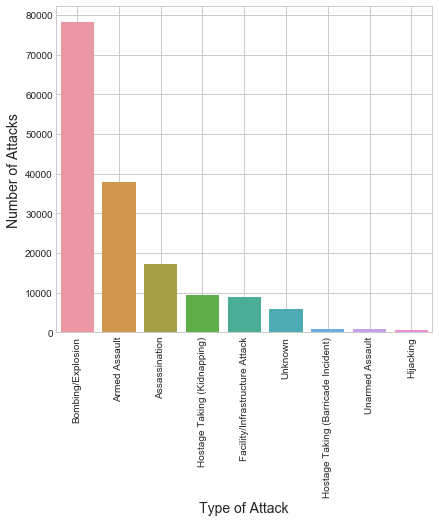

In [176]:
plt.figure(figsize=(6, 6))
sns.barplot(x = 'type_of_attack', y = 'success', data = df_combined_type_gb)
plt.grid(True)
plt.xticks(rotation=90)
plt.xlabel('Type of Attack', fontsize = 14)
plt.ylabel('Number of Attacks', fontsize = 14)
plt.show()

In [224]:
df_kidnapping = df_combined[df_combined['type_of_attack'] == 'Hostage Taking (Kidnapping)']
df_kidnapping = df_kidnapping[['country', 'success']].groupby(['country']).count()

In [228]:
df_bombing = df_combined[df_combined['type_of_attack'] == 'Bombing/Explosion']
df_bombing[['type_of_attack', 'region']].groupby('region', as_index=False).count()

,region,type_of_attack
0,Australasia & Oceania,72
1,Central America & Caribbean,3184
2,Central Asia,231
3,East Asia,291
4,Eastern Europe,1159
5,Middle East & North Africa,26006
6,North America,1528
7,South America,8642
8,South Asia,19834
9,Southeast Asia,4456


In [233]:
df_kidnapping = df_combined[df_combined['type_of_attack'] == 'Hostage Taking (Kidnapping)']
df_kidnapping = df_kidnapping[['country', 'success']].groupby(['country'], as_index=False).count()

In [240]:
df_kidnapping = df_kidnapping.sort_values('success', ascending=False).head(10)
df_kidnapping

,country,success
45,India,1075
24,Colombia,1031
0,Afghanistan,898
47,Iraq,828
77,Pakistan,781
82,Philippines,543
76,Nigeria,381
61,Libya,378
110,Yemen,350
89,Somalia,315


In [187]:
df_target_gb = df_combined[['type_of_target', 'success']].groupby(['type_of_target'], as_index =False).count()
df_target_gb.sort_values(by=['success'], ascending=False).head(10)

,type_of_target,success
13,Private Citizens & Property,37219
9,Military,23758
12,Police,21710
6,Government (General),19170
2,Business,19019
18,Transportation,6208
20,Utilities,5680
19,Unknown,4672
3,Educational Institution,3996
14,Religious Figures/Institutions,3816


In [84]:
#Calculate the total number of attacks by year

df_year_gb = df_combined[['year', 'success']].groupby(['year'], as_index = False).sum()
df_year_10 = df_year_gb.sort_values(by=['success'], ascending = False).head(10)

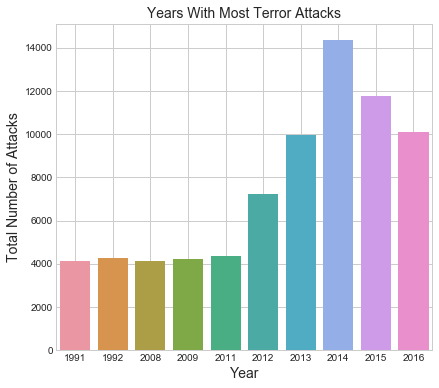

In [94]:
plt.figure(figsize=(6, 6))
sns.set_style('whitegrid')
ax = sns.barplot(x='year', y='success', data = df_year_10)
plt.grid(True)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Total Number of Attacks', fontsize = 14)
plt.title('Years With Most Terror Attacks', fontsize = 14)
plt.show()

In [106]:
#Calculate the total number of attacks by month

df_month_gb = df_combined[['month', 'success']].groupby(['month'], as_index = False).sum()
df_month_gb = df_month_gb.sort_values(by=['success'], ascending = False)
df_month_gb 

,month,success
5,5,13461
7,7,12967
10,10,12337
8,8,12308
3,3,12133
6,6,12046
4,4,11941
1,1,11898
11,11,11711
9,9,11284


In [107]:
#Calculate the total number of attacks by region

df_country_gb = df_combined[['region', 'success']].groupby(['region'], as_index = False).sum()
df_country_gb.sort_values(by=['success'], ascending = False).head()

,region,success
5,Middle East & North Africa,37185
8,South Asia,36694
7,South America,16919
11,Western Europe,13463
10,Sub-Saharan Africa,13454


In [214]:
df_columbia = df_combined[df_combined['country'] == 'Colombia']
df_columbia.columns.tolist()

['year',
 'month',
 'day',
 'country',
 'region',
 'city',
 'latitude',
 'longitude',
 'location',
 'success',
 'sucide',
 'type_of_attack',
 'type_of_target',
 'nationality',
 'group_name',
 'type_of_weapon',
 'num_killed',
 'num_wounded',
 'num_killed_wounded',
 'president',
 'party',
 'code',
 'helper',
 'country_name',
 'gdp_value']

In [217]:
df_columbia[['success', 'type_of_attack']].groupby('type_of_attack', as_index = False).count()

,type_of_attack,success
0,Armed Assault,1933
1,Assassination,1331
2,Bombing/Explosion,3075
3,Facility/Infrastructure Attack,266
4,Hijacking,32
5,Hostage Taking (Barricade Incident),88
6,Hostage Taking (Kidnapping),1031
7,Unarmed Assault,14
8,Unknown,393


In [202]:
df_columbia = df_columbia[['year', 'success']].groupby(['year'], as_index = False).sum()

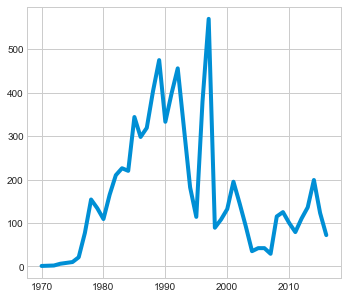

In [203]:
plt.figure(figsize = (5, 5))
x = df_columbia['year']
y = df_columbia['success']
plt.plot(x, y)
plt.show()

In [205]:
df_columbia = df_combined[df_combined['country'] == 'Colombia']

df_columbia = df_columbia[['year', 'success', 'gdp_value']].groupby(['year'],as_index=False).sum()
df_columbia

,year,success,gdp_value
0,1970,1,7.198360e+09
1,1972,2,1.734272e+10
2,1973,6,6.189456e+10
3,1975,10,1.309863e+11
4,1976,21,3.375109e+11
5,1977,77,1.557677e+12
6,1978,154,3.675635e+12
7,1979,134,3.911658e+12
8,1980,109,4.709504e+12
9,1981,165,6.258799e+12


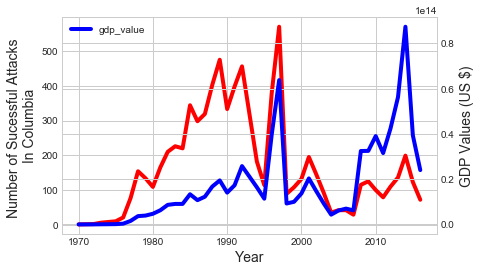

In [210]:
x = df_columbia['year']
y1 = df_columbia['success']
y2 = df_columbia['gdp_value']
fig, ax1 = plt.subplots()
ax1.plot(x, y1, c='r')
ax1.set_ylabel('Number of Sucessful Attacks \nIn Columbia', fontsize = 14)
ax2 = ax1.twinx()
ax2.plot(x, y2, c='b')
ax2.set_ylabel('GDP Values (US $)', fontsize = 14)
ax1.set_xlabel('Year', fontsize = 14)
plt.legend()
plt.show()

In [ ]:
x = df_iraq_year_2000_2016['year']
y1 = df_iraq_year_2000_2016['success']
y2 = df_iraq_year_2000_2016['gdp_value']
fig, ax1 = plt.subplots()
ax1.plot(x, y1, c='r')
ax1.set_ylabel('Number of Sucessful Attacks In Iraq', fontsize = 14)
ax2 = ax1.twinx()
ax2.plot(x, y2, c='b')
ax2.set_ylabel('GDP Values', fontsize = 14)
ax1.set_xlabel('Year', fontsize = 14)
plt.legend()
plt.show()

In [32]:
df_iraq = df_combined[df_combined['country'] == 'Iraq'].reset_index(drop=True)
df_iraq.head()

,year,month,day,country,region,city,latitude,longitude,location,success,...,type_of_weapon,num_killed,num_wounded,num_killed_wounded,president,party,code,helper,country_name,gdp_value
0,1975,3,1,Iraq,Middle East & North Africa,Mosul,36.34,43.130000,NaN,1,...,Unknown,0.0,1.0,1.0,Gerald Ford,Republican,IQ,IQ1975,Iraq,1.345852e+10
1,1976,12,15,Iraq,Middle East & North Africa,Baghdad,33.30,44.400000,NaN,1,...,Explosives/Bombs/Dynamite,10.0,285.0,295.0,Gerald Ford,Republican,IQ,IQ1976,Iraq,1.775483e+10
2,1976,12,18,Iraq,Middle East & North Africa,Penjwon,NaN,NaN,NaN,1,...,Unknown,0.0,0.0,0.0,Gerald Ford,Republican,IQ,IQ1976,Iraq,1.775483e+10
3,1976,12,24,Iraq,Middle East & North Africa,Baghdad,33.30,44.400000,NaN,1,...,Firearms,2.0,0.0,2.0,Gerald Ford,Republican,IQ,IQ1976,Iraq,1.775483e+10
4,1979,6,15,Iraq,Middle East & North Africa,Basra,30.50,47.816667,NaN,1,...,Unknown,1.0,0.0,1.0,Jimmy Carter,Democratic,IQ,IQ1979,Iraq,3.781646e+10


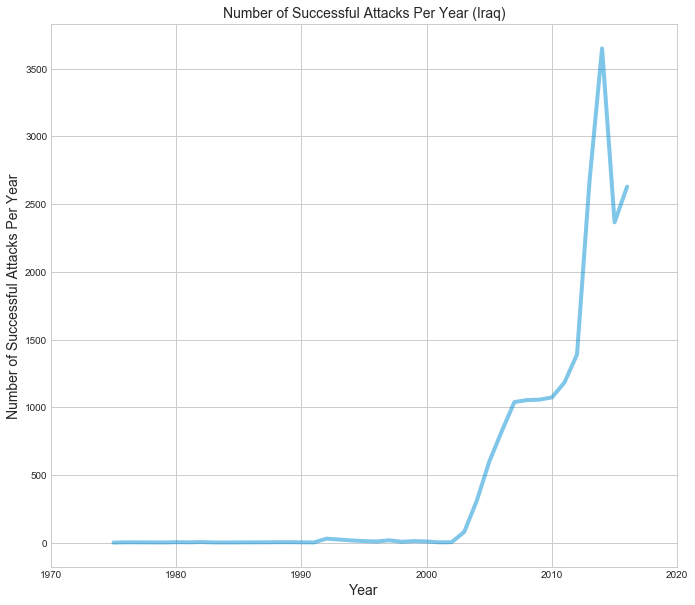

In [124]:
df_iraq_year = df_iraq[['year', 'success']].groupby(['year'],as_index=False).sum()
df_iraq_year[df_iraq_year['year'] > 2000]
plt.figure(figsize=(10, 10))
x = df_iraq_year['year']
y = df_iraq_year['success']
plt.plot(x, y, alpha = 0.5)
plt.ylabel('Number of Successful Attacks Per Year', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.title('Number of Successful Attacks Per Year (Iraq)', fontsize = 14)
plt.xlim(1970, 2020)
plt.show()

In [34]:
df_iraq_city_gb = df_iraq[['city', 'success']].groupby('city', as_index=False).sum()
df_iraq_city_gb.sort_values(by=['success'], ascending=False).head()

,city,success
351,Baghdad,6888
829,Mosul,1603
744,Kirkuk,813
371,Baqubah,679
486,Fallujah,500


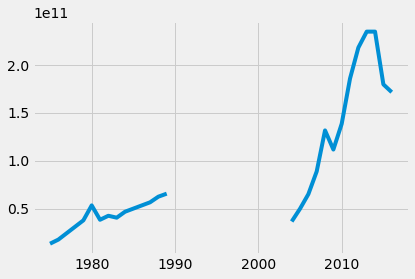

In [35]:
plt.style.use('fivethirtyeight')
x = df_iraq['year']
y = df_iraq['gdp_value']
plt.plot(x, y)
plt.show()

In [36]:
df_iraq_2000_2016 = df_iraq[df_iraq['year'] > 2000].reset_index(drop=True)
x = df_iraq_2000_2016['year']
y = df_iraq_2000_2016['gdp_value']

In [37]:
df_iraq_year = df_iraq[['year', 'success', 'gdp_value']].groupby(['year'],as_index=False).sum()
df_iraq_year_2000_2016 = df_iraq_year[df_iraq_year['year'] > 2000].reset_index(drop=True)
df_iraq_year_2000_2016 = df_iraq_year_2000_2016.fillna(0)

In [38]:
df_iraq_year_2000_2016

,year,success,gdp_value
0,2001,3,0.000000e+00
1,2002,4,0.000000e+00
2,2003,80,0.000000e+00
3,2004,310,1.172093e+13
4,2005,599,3.087212e+13
5,2006,824,5.452243e+13
6,2007,1038,9.301553e+13
7,2008,1053,1.454335e+14
8,2009,1056,1.269586e+14
9,2010,1073,1.633115e+14


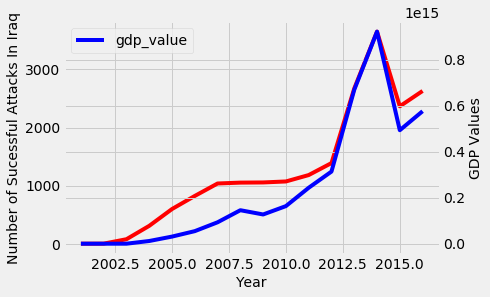

In [39]:
x = df_iraq_year_2000_2016['year']
y1 = df_iraq_year_2000_2016['success']
y2 = df_iraq_year_2000_2016['gdp_value']
fig, ax1 = plt.subplots()
ax1.plot(x, y1, c='r')
ax1.set_ylabel('Number of Sucessful Attacks In Iraq', fontsize = 14)
ax2 = ax1.twinx()
ax2.plot(x, y2, c='b')
ax2.set_ylabel('GDP Values', fontsize = 14)
ax1.set_xlabel('Year', fontsize = 14)
plt.legend()
plt.show()

In [40]:
df_iraq.corr()

,year,month,day,latitude,longitude,success,sucide,num_killed,num_wounded,num_killed_wounded,gdp_value
year,1.000000,-0.023877,0.032349,0.039087,-0.165203,-0.131492,-0.021563,-0.027539,-0.095995,-0.081997,0.726901
month,-0.023877,1.000000,0.016606,0.012473,-0.013136,-0.014316,-0.003371,-0.001983,-0.002370,-0.002713,0.012756
day,0.032349,0.016606,1.000000,0.004110,-0.008637,-0.016286,0.007688,-0.002996,0.001312,-0.000662,0.047261
latitude,0.039087,0.012473,0.004110,1.000000,-0.518664,-0.039529,0.049071,0.012454,-0.052586,-0.030359,0.123895
longitude,-0.165203,-0.013136,-0.008637,-0.518664,1.000000,0.150974,-0.106990,-0.037507,0.040615,0.008706,-0.122191
success,-0.131492,-0.014316,-0.016286,-0.039529,0.150974,1.000000,-0.078691,0.029410,0.078911,0.070983,-0.031522
sucide,-0.021563,-0.003371,0.007688,0.049071,-0.106990,-0.078691,1.000000,0.168874,0.208212,0.235529,-0.088614
num_killed,-0.027539,-0.001983,-0.002996,0.012454,-0.037507,0.029410,0.168874,1.000000,0.305848,0.743349,-0.048183
num_wounded,-0.095995,-0.002370,0.001312,-0.052586,0.040615,0.078911,0.208212,0.305848,1.000000,0.864202,-0.097045
num_killed_wounded,-0.081997,-0.002713,-0.000662,-0.030359,0.008706,0.070983,0.235529,0.743349,0.864202,1.000000,-0.093702


In [41]:
df_iraq_attack_type = df_iraq[['type_of_attack', 'success']].groupby(['type_of_attack'], as_index=False).count()
df_iraq_attack_type.sort_values(by=['success'], ascending=False).reset_index(drop=True)

,type_of_attack,success
0,Bombing/Explosion,16399
1,Armed Assault,2959
2,Assassination,1233
3,Hostage Taking (Kidnapping),828
4,Unknown,544
5,Facility/Infrastructure Attack,131
6,Hostage Taking (Barricade Incident),22
7,Hijacking,10
8,Unarmed Assault,4


In [42]:
df_iraq[['city', 'success', 'year']].groupby(['city', 'year'], as_index = False).sum().sort_values(by='success', ascending=False).head()

,city,year,success
544,Baghdad,2015,951
545,Baghdad,2016,938
543,Baghdad,2014,855
542,Baghdad,2013,616
539,Baghdad,2010,552


In [43]:
df_baghdad = df_iraq[df_iraq['city'] == 'Baghdad']
df_baghdad_gb = df_baghdad[['group_name', 'success']].groupby('group_name', as_index=False).sum()
df_baghdad_gb.sort_values(by='success', ascending=False).head()

,group_name,success
53,Unknown,5923
26,Islamic State of Iraq and the Levant (ISIL),556
6,Al-Qaida in Iraq,210
25,Islamic State of Iraq (ISI),54
52,Tawhid and Jihad,19


In [44]:
df_isis = df_iraq[df_iraq['group_name'] == 'Islamic State of Iraq and the Levant (ISIL)'].reset_index()
df_isis[['city', 'success']].groupby('city', as_index=False).sum().sort_values(by='success', ascending=False).head()

,city,success
144,Baghdad,556
347,Mosul,282
394,Ramadi,117
185,Dawr district,106
199,Fallujah,91


In [45]:
df_isis[['type_of_target', 'success']].groupby('type_of_target', 
                                               as_index=False).sum().sort_values(by='success', 
                                                                                 ascending=False).head()

,type_of_target,success
11,Private Citizens & Property,1360
7,Military,649
10,Police,454
1,Business,169
13,Terrorists/Non-State Militia,123


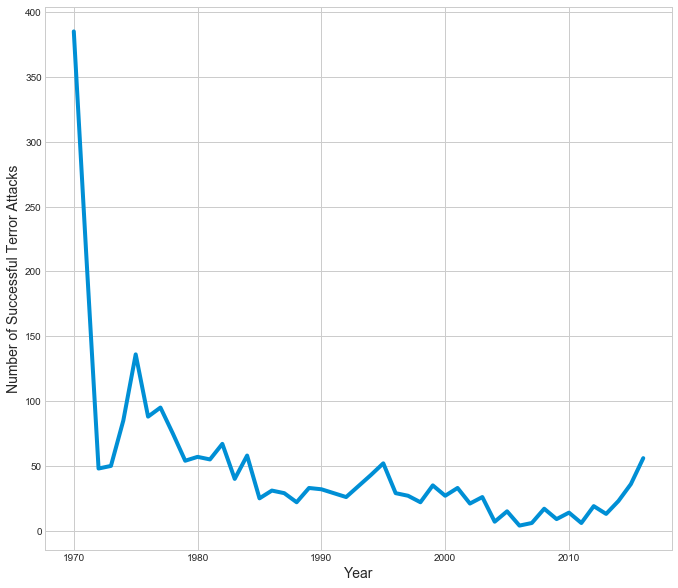

In [122]:
plt.figure(figsize=(10, 10))
df_usa = df_combined[df_combined['country'] == 'United States']
df_usa_gb = df_usa[['year', 'success']].groupby('year', as_index=False).sum()
x = df_usa_gb['year']
y = df_usa_gb['success']
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Successful Terror Attacks', fontsize = 14)
plt.plot(x, y)
plt.show()

In [125]:
df_usa = df_combined[df_combined['country'] == 'United States']
df_usa[['city', 'success']].groupby('city', as_index=False).sum().sort_values(by='success', ascending=False).head()

,city,success
428,New York City,353
551,San Juan,101
351,Los Angeles,95
547,San Francisco,79
387,Miami,77


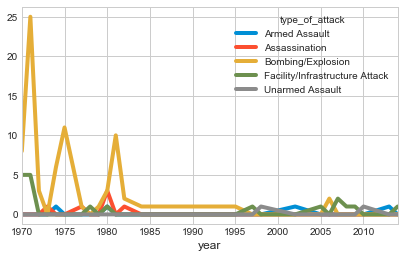

In [130]:
df_losangeles = df_usa[df_usa['city'] == 'Los Angeles']
df_losangeles[['year', 
               'success']].groupby('year', 
                                           as_index=False).sum().sort_values(by='success', 
                                                                             ascending=False).head()
cross_la = pd.crosstab(df_losangeles.year, df_losangeles.type_of_attack)
cross_la.plot()
plt.show()

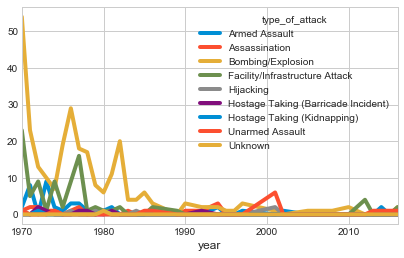

In [129]:
df_nyc = df_usa[df_usa['city'] == 'New York City']
df_nyc[['year', 
               'success']].groupby('year', 
                                           as_index=False).sum().sort_values(by='success', 
                                                                             ascending=False).head()
cross_nyc = pd.crosstab(df_nyc.year, df_nyc.type_of_attack)
cross_nyc.plot()
plt.show()